In [1]:
with open("shakespeare.txt", "r", encoding="utf-8") as file:
     text = file.read()

# Unique characters in the dataset
chars = sorted(list(set(text)))
num_chars = len(chars)

# Create character to index and index to character mappings
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

# Convert text to numerical representation
text_numeric = [char_to_index[char] for char in text]

In [3]:
# Step 2: Train the MLP model

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Prepare the training data
SEQ_LENGTH = 112
STEP = 1

sentences = []
next_chars = []
for i in range(0, len(text) - SEQ_LENGTH, STEP):
    sentences.append(text[i: i + SEQ_LENGTH])
    next_chars.append(text[i + SEQ_LENGTH])

# Vectorization
X = np.zeros((len(sentences), SEQ_LENGTH * num_chars), dtype=bool)
y = np.zeros((len(sentences), num_chars), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t * num_chars + char_to_index[char]] = 1
    y[i, char_to_index[next_chars[i]]] = 1


# Define the model
model = Sequential()
model.add(Dense(128, input_shape=(SEQ_LENGTH * num_chars,), activation='relu'))
model.add(Dense(num_chars, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(X, y, batch_size=128, epochs=10)





Epoch 1/10

8714/8714 [==============================] - 85s 10ms/step - loss: 2.1687
Epoch 2/10
8714/8714 [==============================] - 79s 9ms/step - loss: 1.8497
Epoch 3/10
8714/8714 [==============================] - 79s 9ms/step - loss: 1.7308
Epoch 4/10
8714/8714 [==============================] - 77s 9ms/step - loss: 1.6511
Epoch 5/10
8714/8714 [==============================] - 79s 9ms/step - loss: 1.5910
Epoch 6/10
8714/8714 [==============================] - 80s 9ms/step - loss: 1.5437
Epoch 7/10
8714/8714 [==============================] - 69s 8ms/step - loss: 1.5041
Epoch 8/10
8714/8714 [==============================] - 71s 8ms/step - loss: 1.4718
Epoch 9/10
8714/8714 [==============================] - 73s 8ms/step - loss: 1.4433
Epoch 10/10
8714/8714 [==============================] - 63s 7ms/step - loss: 1.4192


In [4]:
# GENERATE TEXT FUNCTION
def generate_text(seed_text, next_chars=100):
    generated_text = seed_text
    for _ in range(next_chars):
        X_pred = np.zeros((1, SEQ_LENGTH * num_chars))
        for t, char in enumerate(seed_text):
            X_pred[0, t * num_chars + char_to_index[char]] = 1
        preds = model.predict(X_pred, verbose=0)[0]
        next_index = np.random.choice(num_chars, p=preds)
        next_char = index_to_char[next_index]
        generated_text += next_char
        seed_text = seed_text[1:] + next_char
    return generated_text

print(generate_text("The quick brown fox jumps over the lazy dog", next_chars=120))

The quick brown fox jumps over the lazy dogos rto Iruet'wtr mylom
aese'a,tyins
I?iopAslt
hfurea ni!aoAifr'ua osw
a,aAm
sIa ot.,tstsa-oaN !;i'tisaoaaail
ytu acf,iab


In [6]:
# Save the model
model.save("model_1_shakespeare.h5")

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


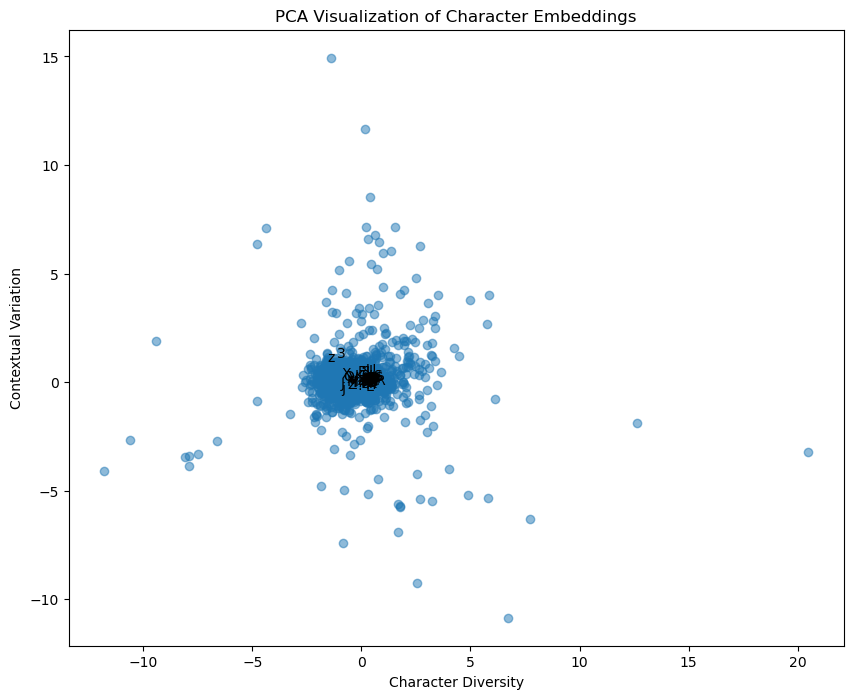

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
embeddings = model.layers[0].get_weights()[0]
embeddings_pca = pca.fit_transform(embeddings)

# Rename the components
pca_component_names = ['Character Diversity', 'Contextual Variation']

# Visualize embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Character Embeddings')
plt.xlabel(pca_component_names[0])  
plt.ylabel(pca_component_names[1])  

# Annotate points with characters
for i, char in enumerate(chars):
    plt.annotate(char, (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()